# Práctica 5. Naïve Bayes

Francisco Pineda Hernández

# 0 - Librerías 

In [ ]:
# Librerias generales para manipulacion y visualizacion de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 
from sklearn.model_selection import train_test_split 

#
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 1 - Carga de Datasets

## Iris

In [33]:
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Emails

In [34]:
emails = pd.read_csv('emails.csv')
emails

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


# 2 - Mezcla de datos

In [35]:
iris_train, iris_test = train_test_split(iris, train_size=0.7, test_size=0.3, shuffle=True, random_state=0)

In [36]:
emails_train, emails_test = train_test_split(emails, train_size=0.7, test_size=0.3, shuffle=True, random_state=0)

In [37]:
kf = KFold(n_splits=3, shuffle=True) # Creamos un objeto con nuestro numero de conjuntos de validación (6) y las ordenes de shuffle
kf

KFold(n_splits=3, random_state=None, shuffle=True)

In [38]:
for i, (iris_train_index, iris_test_index) in enumerate(kf.split(iris_train)):
    print(f"Fold {i + 1}:")
    print(f"  Train: index={iris_train_index} len = {len(iris_train_index)}")
    print(f"  Test:  index={iris_test_index} len = {len(iris_test_index)}")

Fold 1:
  Train: index=[  0   1   2   5   7  10  11  12  13  14  15  16  17  18  19  20  21  23
  25  26  27  29  31  32  33  34  35  37  39  40  41  42  43  46  48  50
  52  53  56  57  59  60  63  65  68  69  70  72  73  74  75  77  78  81
  82  84  85  86  88  89  90  92  93  94  95  97  98  99 100 101] len = 70
  Test:  index=[  3   4   6   8   9  22  24  28  30  36  38  44  45  47  49  51  54  55
  58  61  62  64  66  67  71  76  79  80  83  87  91  96 102 103 104] len = 35
Fold 2:
  Train: index=[  2   3   4   5   6   7   8   9  10  11  15  16  19  20  22  24  25  28
  29  30  36  37  38  40  41  42  44  45  46  47  49  51  54  55  57  58
  61  62  63  64  66  67  68  69  70  71  72  73  75  76  79  80  83  84
  85  87  89  90  91  93  94  96  97  98  99 100 101 102 103 104] len = 70
  Test:  index=[ 0  1 12 13 14 17 18 21 23 26 27 31 32 33 34 35 39 43 48 50 52 53 56 59
 60 65 74 77 78 81 82 86 88 92 95] len = 35
Fold 3:
  Train: index=[  0   1   3   4   6   8   9  12  13  14  17

In [39]:
iris.iloc[iris_train_index]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica


In [40]:
X_iris = iris.iloc[iris_train_index].drop('species', axis=1)
y_iris = iris.iloc[iris_train_index]['species']

In [41]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_iris, y_iris)

,priors,None
,var_smoothing,1e-09


In [42]:
X_iris_test = iris.iloc[iris_test_index].drop('species', axis=1)
y_iris_test = iris.iloc[iris_test_index]['species']

In [44]:
predictions_iris = gaussian_nb.predict(X_iris_test)
accuracy_iris = accuracy_score(y_iris_test, predictions_iris)

In [45]:
print(accuracy_iris)

0.9428571428571428


In [48]:
iris_classification_report = classification_report(y_iris_test, predictions_iris)
print(iris_classification_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.89      1.00      0.94        17
 Iris-virginica       0.00      0.00      0.00         2

       accuracy                           0.94        35
      macro avg       0.63      0.67      0.65        35
   weighted avg       0.89      0.94      0.92        35



/home/pineda/GitHub/ESCOM_machine-learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/pineda/GitHub/ESCOM_machine-learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/pineda/GitHub/ESCOM_machine-learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [49]:
print("Iris Confusion Matrix:")
cm_iris = confusion_matrix(y_iris_test, predictions_iris)
print(cm_iris)

Iris Confusion Matrix:
[[16  0  0]
 [ 0 17  0]
 [ 0  2  0]]


Text(0.5, 1.0, 'Iris - Gaussian NB Confusion Matrix')

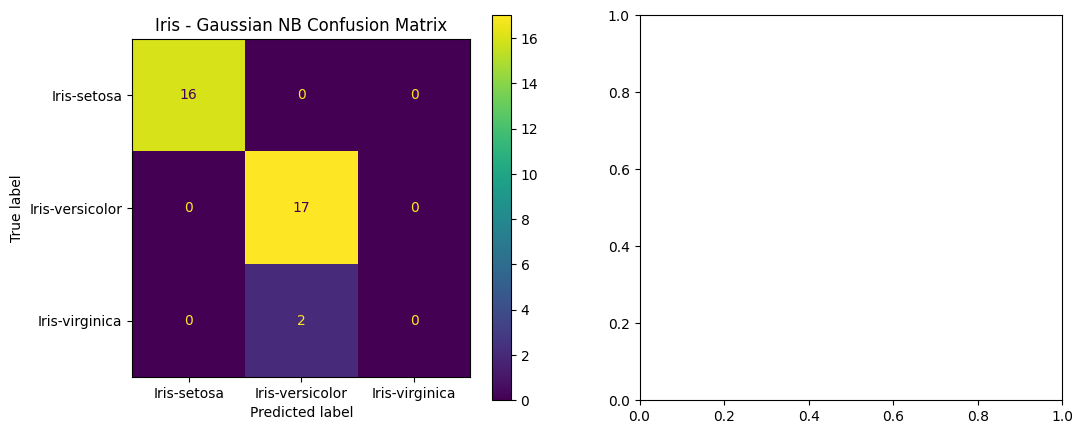

In [50]:
# For Iris (GaussianNB)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Iris confusion matrix plot
disp_iris = ConfusionMatrixDisplay(confusion_matrix=cm_iris, display_labels=gaussian_nb.classes_)
disp_iris.plot(ax=ax1)
ax1.set_title('Iris - Gaussian NB Confusion Matrix')
